# Mobile Price Classification

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importin Data

In [68]:
df_raw=pd.read_csv('train.csv')

In [69]:
df=df_raw.copy()

In [70]:
pd.set_option('display.max_columns', None)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [71]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [72]:
df.groupby('price_range').size()

price_range
0    500
1    500
2    500
3    500
dtype: int64

## Data_Processing

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [74]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## EDA

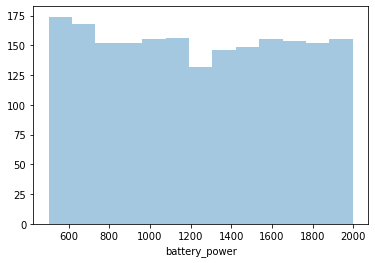

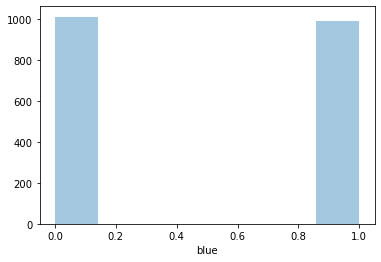

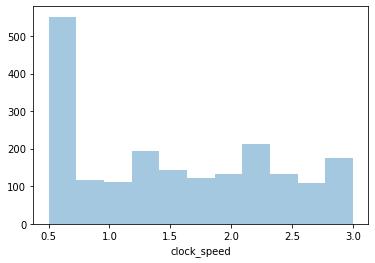

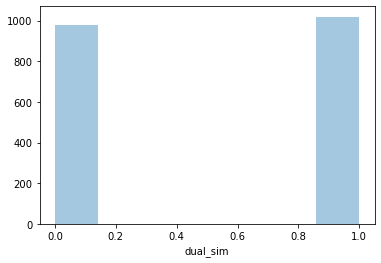

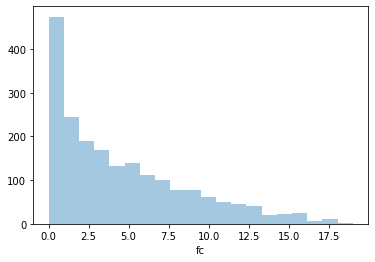

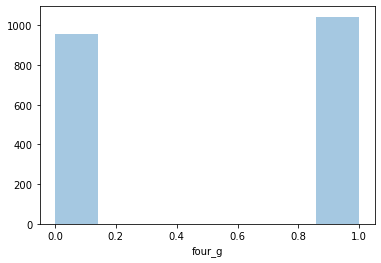

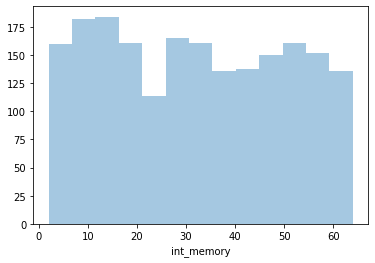

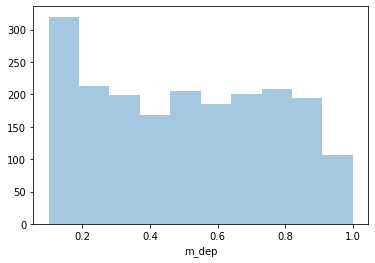

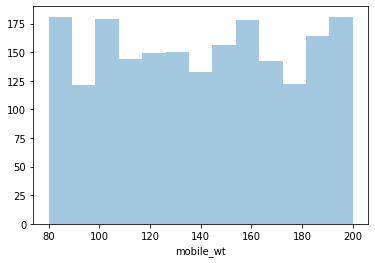

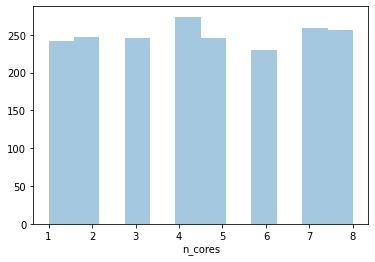

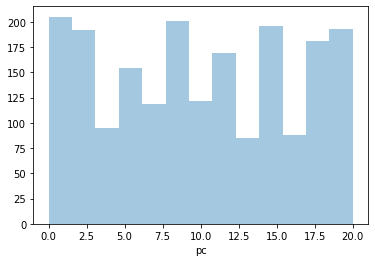

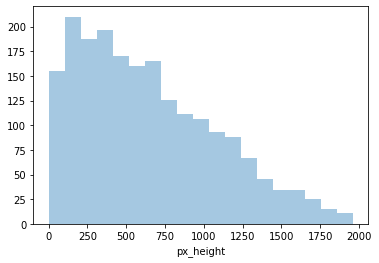

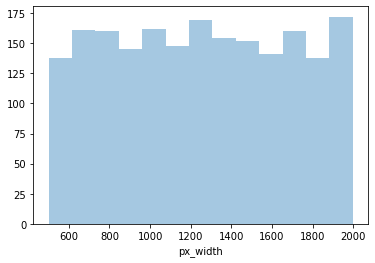

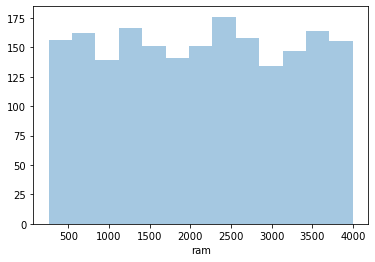

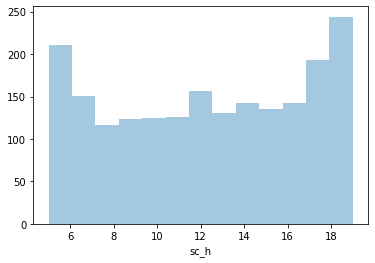

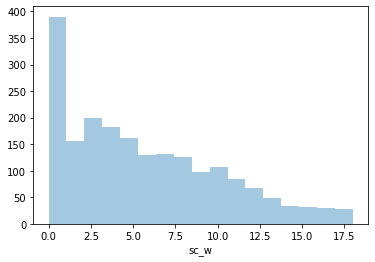

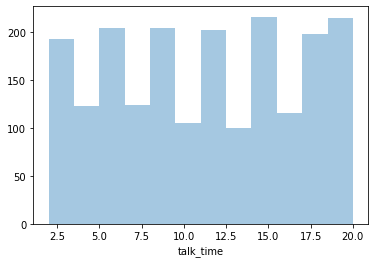

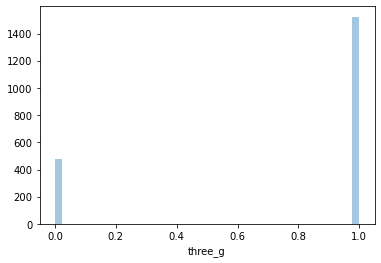

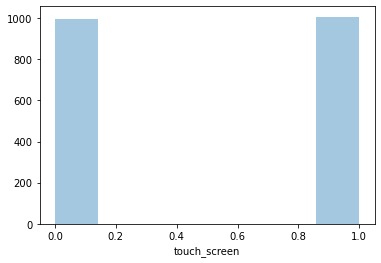

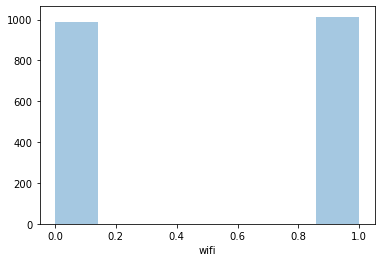

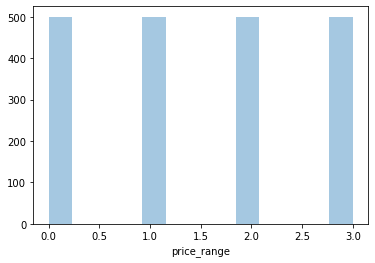

In [75]:
for i in df.columns:
    sns.distplot(df[i],kde=False)
    plt.show()

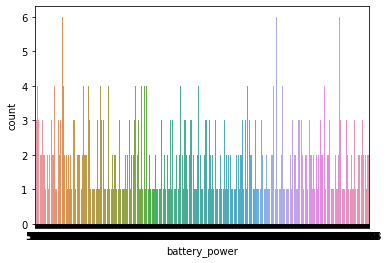

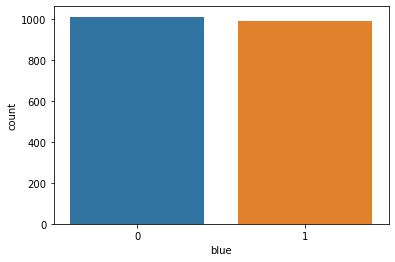

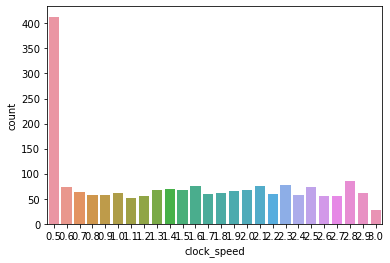

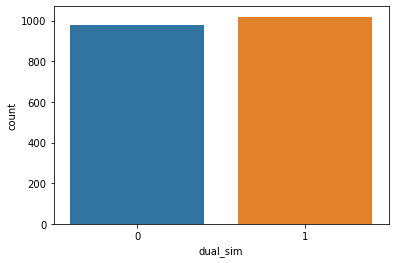

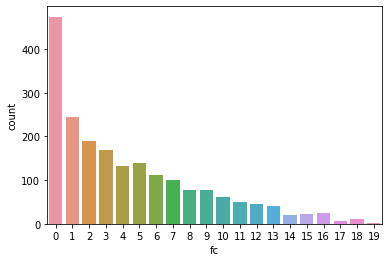

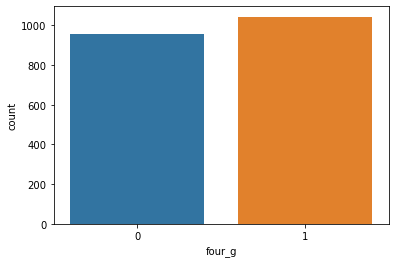

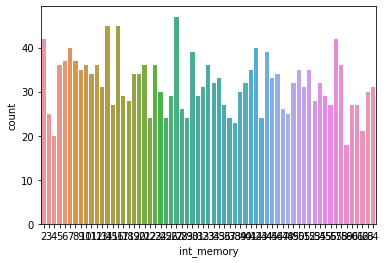

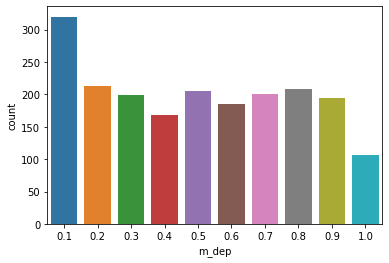

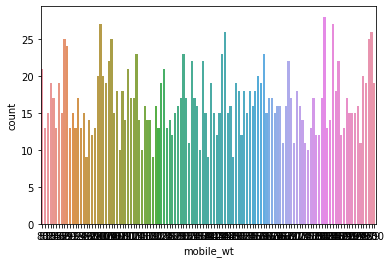

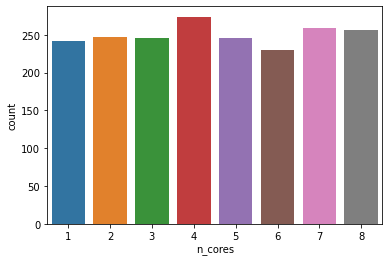

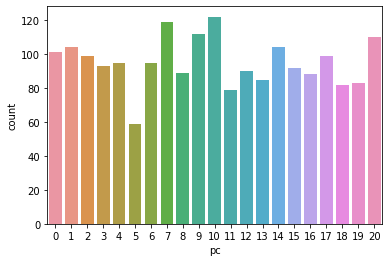

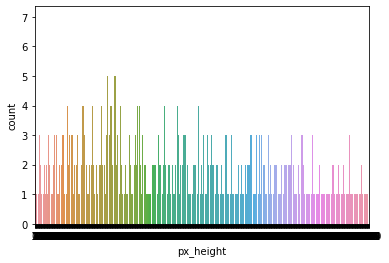

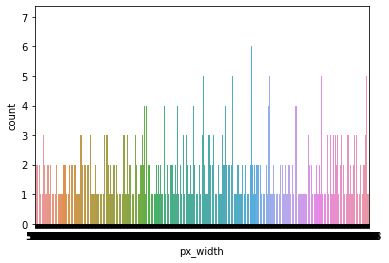

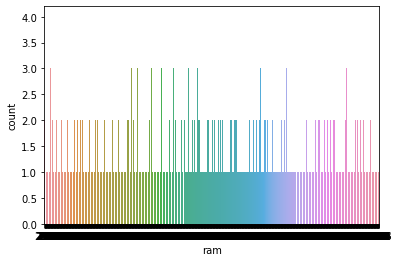

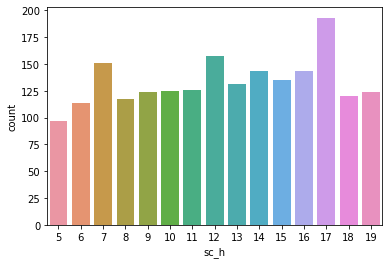

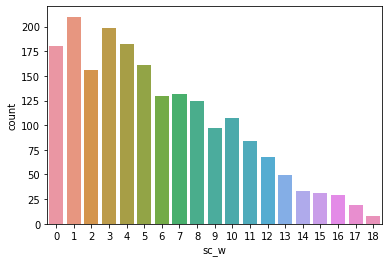

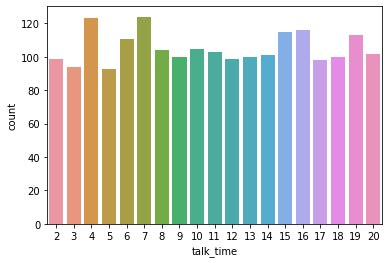

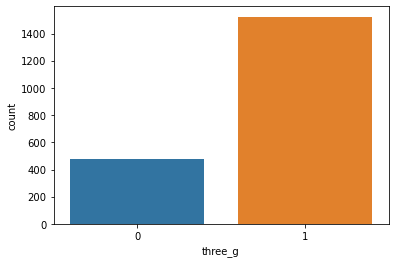

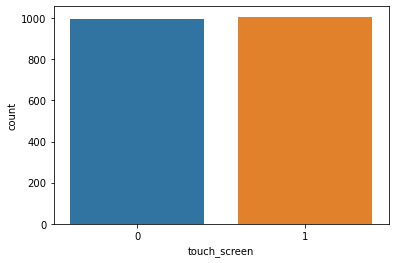

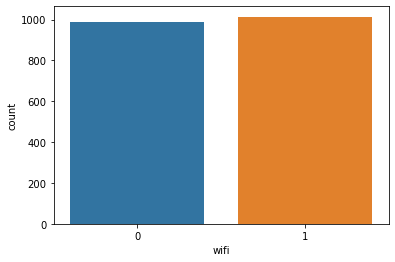

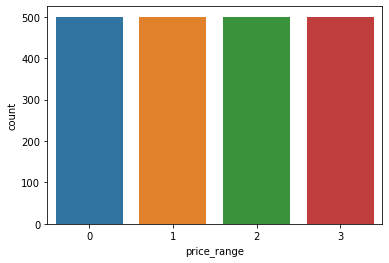

In [78]:
for i in df.columns:
    sns.countplot(df[i])
    plt.show()

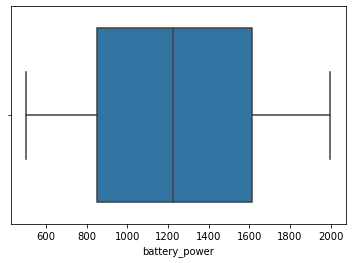

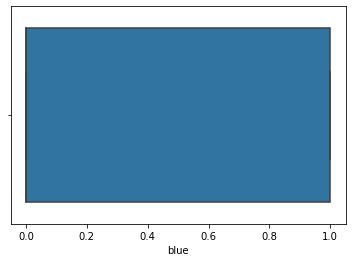

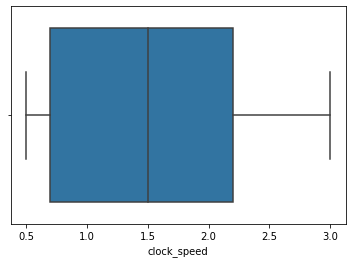

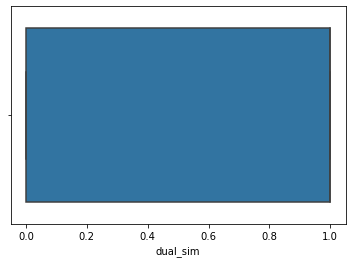

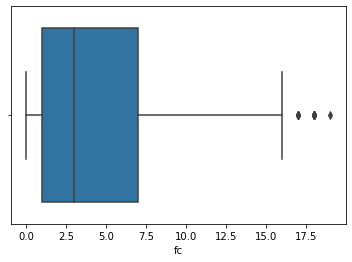

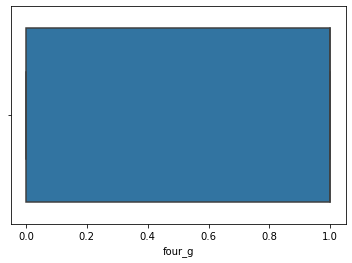

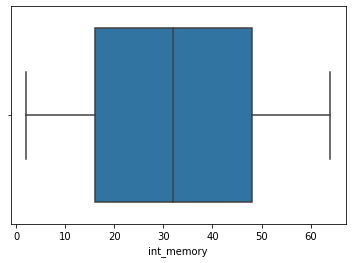

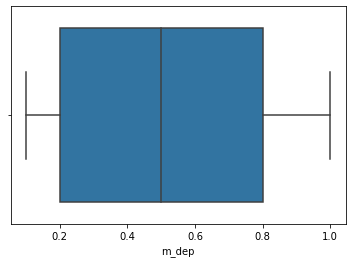

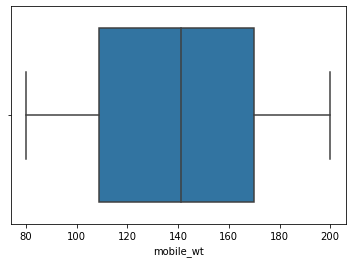

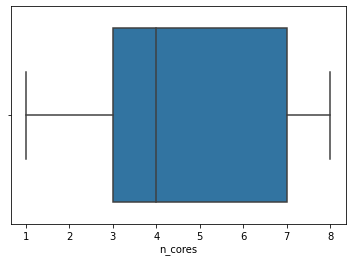

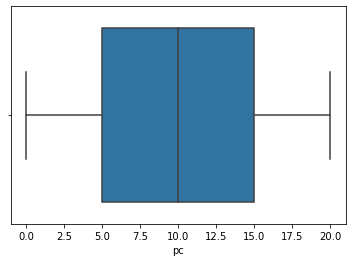

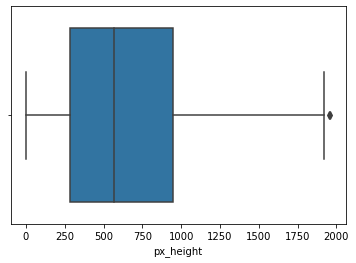

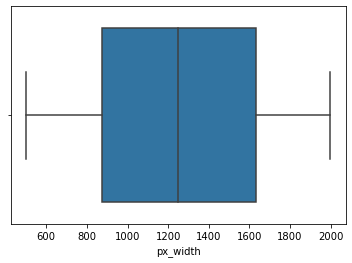

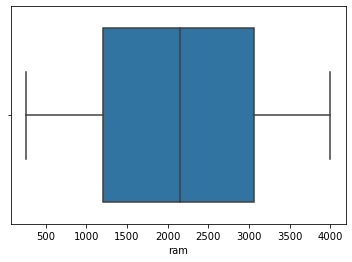

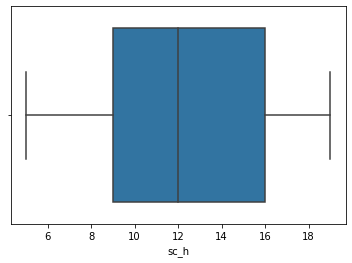

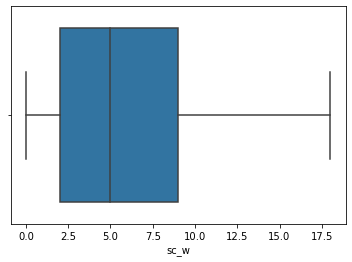

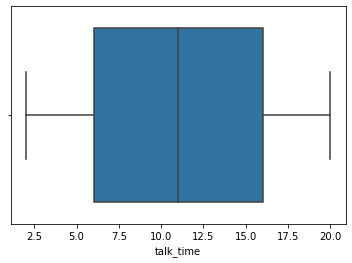

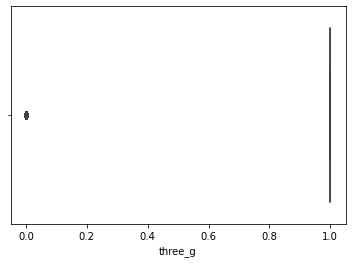

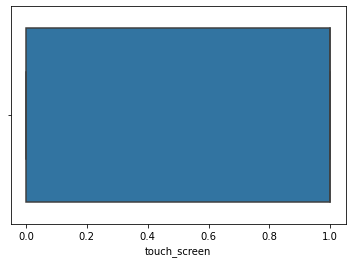

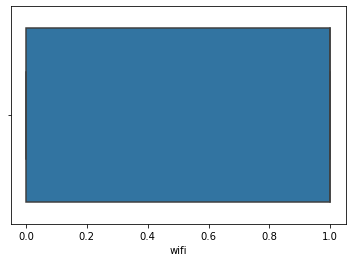

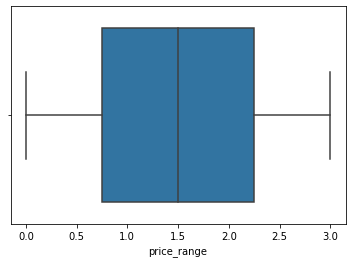

In [80]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

## Split Data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=df.drop('price_range',axis=1)
y=df['price_range']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Standerdization

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [16]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Models

### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score

In [19]:
M1=RandomForestClassifier()
M1.fit(X_train,y_train)
P1=M1.predict(X_test)
print('classification Report:',classification_report(y_test,P1))
print('\n')
print('Confusion Matrix:', confusion_matrix(y_test,P1))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P1))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M1.predict_proba(X_test),multi_class='ovr'))

classification Report:               precision    recall  f1-score   support

           0       0.94      0.94      0.94       151
           1       0.83      0.87      0.85       146
           2       0.82      0.79      0.81       148
           3       0.91      0.90      0.91       155

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



Confusion Matrix: [[142   9   0   0]
 [  9 127  10   0]
 [  0  17 117  14]
 [  0   0  15 140]]


ACCURACY: 0.8766666666666667


Roc Value: 0.9807818339646385


### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
M2=DecisionTreeClassifier()
M2.fit(X_train,y_train)
P2=M2.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P2))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P2))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P2))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M2.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       151
           1       0.75      0.81      0.78       146
           2       0.74      0.74      0.74       148
           3       0.86      0.86      0.86       155

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



Confusion Matrix: 
 [[131  20   0   0]
 [ 11 118  16   1]
 [  0  19 109  20]
 [  0   0  22 133]]


ACCURACY: 0.8183333333333334


Roc Value: 0.878582008970132


## Knn

In [26]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

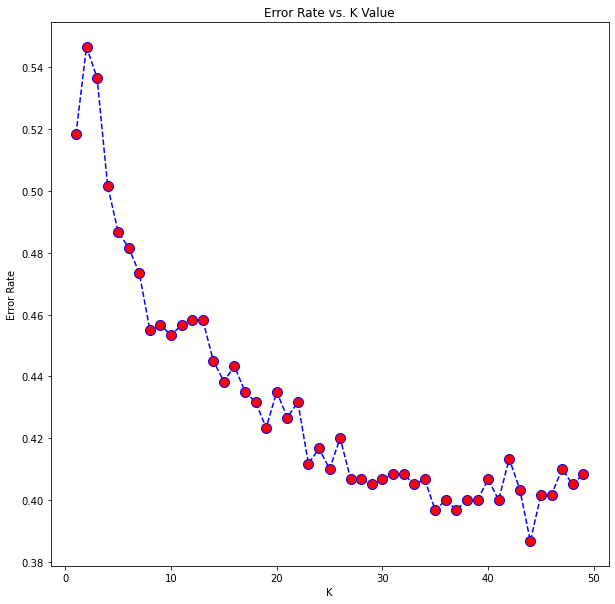

In [32]:
error_Mat=[]
for i in range (1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(np.mean(predict_i != y_test))
plt.figure(figsize=(10,10))
plt.plot(range(1,50),error_Mat,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
M3=KNeighborsClassifier(n_neighbors=44)
M3.fit(X_train,y_train)
P3=M3.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P3))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P3))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P3))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M3.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.70      0.71       151
           1       0.47      0.57      0.51       146
           2       0.51      0.54      0.52       148
           3       0.85      0.64      0.73       155

    accuracy                           0.61       600
   macro avg       0.64      0.61      0.62       600
weighted avg       0.64      0.61      0.62       600



Confusion Matrix: 
 [[106  40   5   0]
 [ 39  83  23   1]
 [  3  49  80  16]
 [  0   6  50  99]]


ACCURACY: 0.6133333333333333


Roc Value: 0.8283270903936181


### NB

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
M4=GaussianNB()
M4.fit(X_train,y_train)
P4=M4.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P4))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P4))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P4))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M4.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       151
           1       0.74      0.73      0.74       146
           2       0.67      0.72      0.70       148
           3       0.88      0.83      0.86       155

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



Confusion Matrix: 
 [[137  14   0   0]
 [ 13 107  26   0]
 [  0  24 107  17]
 [  0   0  26 129]]


ACCURACY: 0.8


Roc Value: 0.9509270991722998


### GB Boosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
M5=GradientBoostingClassifier()
M5.fit(X_train,y_train)
P5=M5.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P5))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P5))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P5))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M5.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       151
           1       0.85      0.88      0.87       146
           2       0.83      0.82      0.83       148
           3       0.92      0.90      0.91       155

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



Confusion Matrix: 
 [[141  10   0   0]
 [  7 129  10   0]
 [  0  13 122  13]
 [  0   0  15 140]]


ACCURACY: 0.8866666666666667


Roc Value: 0.9820674684794696


### Hist Boosing

In [41]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [42]:
M6=HistGradientBoostingClassifier()
M6.fit(X_train,y_train)
P6=M6.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P6))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P6))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P6))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M6.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       151
           1       0.84      0.89      0.87       146
           2       0.86      0.82      0.84       148
           3       0.93      0.92      0.92       155

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



Confusion Matrix: 
 [[143   8   0   0]
 [ 10 130   6   0]
 [  0  16 121  11]
 [  0   0  13 142]]


ACCURACY: 0.8933333333333333


Roc Value: 0.9873582137614854


### Neural Network

In [43]:
from sklearn.neural_network import MLPClassifier

In [51]:
M7=MLPClassifier(hidden_layer_sizes=(50,))
M7.fit(X_train,y_train)
P7=M7.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P7))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P7))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P7))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M7.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       151
           1       0.88      0.91      0.89       146
           2       0.91      0.90      0.90       148
           3       0.95      0.94      0.94       155

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



Confusion Matrix: 
 [[140  11   0   0]
 [ 10 133   3   0]
 [  0   8 133   7]
 [  0   0  10 145]]


ACCURACY: 0.9183333333333333


Roc Value: 0.9930901757281345


### XG Boost

In [52]:
from xgboost import XGBClassifier

In [54]:
M8=XGBClassifier()
M8.fit(X_train,y_train)
P8=M8.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P8))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P8))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P8))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M8.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       151
           1       0.84      0.92      0.88       146
           2       0.88      0.82      0.85       148
           3       0.92      0.93      0.93       155

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



Confusion Matrix: 
 [[141  10   0   0]
 [  7 134   5   0]
 [  0  15 121  12]
 [  0   0  11 144]]


ACCURACY: 0.9


Roc Value: 0.9885221236074389


### Cat Boost

In [55]:
from catboost import CatBoostClassifier

In [57]:
M9=CatBoostClassifier()
M9.fit(X_train,y_train)
P9=M9.predict(X_test)

Learning rate set to 0.080496
0:	learn: 1.2687358	total: 27.9ms	remaining: 27.8s
1:	learn: 1.1782528	total: 42.7ms	remaining: 21.3s
2:	learn: 1.1082493	total: 52.9ms	remaining: 17.6s
3:	learn: 1.0461180	total: 61.5ms	remaining: 15.3s
4:	learn: 0.9885161	total: 70.7ms	remaining: 14.1s
5:	learn: 0.9280125	total: 79.7ms	remaining: 13.2s
6:	learn: 0.8879560	total: 88.8ms	remaining: 12.6s
7:	learn: 0.8475734	total: 97.9ms	remaining: 12.1s
8:	learn: 0.8062035	total: 107ms	remaining: 11.7s
9:	learn: 0.7767707	total: 116ms	remaining: 11.5s
10:	learn: 0.7429684	total: 125ms	remaining: 11.2s
11:	learn: 0.7160753	total: 134ms	remaining: 11s
12:	learn: 0.6880342	total: 143ms	remaining: 10.8s
13:	learn: 0.6566234	total: 152ms	remaining: 10.7s
14:	learn: 0.6311161	total: 160ms	remaining: 10.5s
15:	learn: 0.6078354	total: 169ms	remaining: 10.4s
16:	learn: 0.5895613	total: 182ms	remaining: 10.5s
17:	learn: 0.5716345	total: 193ms	remaining: 10.5s
18:	learn: 0.5555930	total: 204ms	remaining: 10.5s
19:	l

In [58]:
print('classification Report:','\n',classification_report(y_test,P9))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P9))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P9))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M9.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       151
           1       0.87      0.95      0.91       146
           2       0.91      0.85      0.88       148
           3       0.94      0.94      0.94       155

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



Confusion Matrix: 
 [[143   8   0   0]
 [  6 138   2   0]
 [  0  12 126  10]
 [  0   0  10 145]]


ACCURACY: 0.92


Roc Value: 0.9944636336138535


### Light GBM

In [59]:
from lightgbm import LGBMClassifier

In [60]:
M10=LGBMClassifier()
M10.fit(X_train,y_train)
P10=M10.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P10))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P10))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P10))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M10.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       151
           1       0.84      0.91      0.88       146
           2       0.87      0.82      0.85       148
           3       0.93      0.92      0.92       155

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



Confusion Matrix: 
 [[141  10   0   0]
 [  8 133   5   0]
 [  0  15 122  11]
 [  0   0  13 142]]


ACCURACY: 0.8966666666666666


Roc Value: 0.9876771050555494


### Bagging

In [61]:
from sklearn.ensemble import BaggingClassifier

In [63]:
M11=BaggingClassifier(base_estimator=MLPClassifier())
M11.fit(X_train,y_train)
P11=M11.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P11))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P11))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P11))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M11.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       151
           1       0.85      0.92      0.89       146
           2       0.89      0.85      0.87       148
           3       0.94      0.92      0.93       155

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



Confusion Matrix: 
 [[140  11   0   0]
 [  8 135   3   0]
 [  0  13 126   9]
 [  0   0  12 143]]


ACCURACY: 0.9066666666666666


Roc Value: 0.9890784814774075


## All at one Place

In [64]:
Name=['Random Forest Classifier','Decision Tree','Naive Bayes classifier', 'KNN', 
      'GBBoosting','Histogram Boosting Classifier','XGB Boosting','Light GBM',
      'CAT Boosting','Neural_Network','Bagging_classifier']
clfs= [RandomForestClassifier(),DecisionTreeClassifier(),GaussianNB(),KNeighborsClassifier(n_neighbors=44),
      GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1),
       HistGradientBoostingClassifier(),XGBClassifier(),LGBMClassifier(),MLPClassifier(),
       CatBoostClassifier(),BaggingClassifier(base_estimator=MLPClassifier())]

In [65]:
results=[]

for i in clfs:
    i.fit(X_train,y_train)
    score=roc_auc_score(y_test,i.predict_proba(X_test),multi_class='ovr')
    results.append(score)
    
Score=pd.DataFrame(data=results,index=Name)
Score.columns=['Accuracy']

Learning rate set to 0.080496
0:	learn: 1.2687358	total: 19.4ms	remaining: 19.3s
1:	learn: 1.1782528	total: 33.8ms	remaining: 16.9s
2:	learn: 1.1082493	total: 45.1ms	remaining: 15s
3:	learn: 1.0461180	total: 58.9ms	remaining: 14.7s
4:	learn: 0.9885161	total: 71.6ms	remaining: 14.2s
5:	learn: 0.9280125	total: 86.5ms	remaining: 14.3s
6:	learn: 0.8879560	total: 102ms	remaining: 14.4s
7:	learn: 0.8475734	total: 117ms	remaining: 14.5s
8:	learn: 0.8062035	total: 131ms	remaining: 14.5s
9:	learn: 0.7767707	total: 143ms	remaining: 14.2s
10:	learn: 0.7429684	total: 153ms	remaining: 13.8s
11:	learn: 0.7160753	total: 166ms	remaining: 13.6s
12:	learn: 0.6880342	total: 180ms	remaining: 13.7s
13:	learn: 0.6566234	total: 196ms	remaining: 13.8s
14:	learn: 0.6311161	total: 208ms	remaining: 13.7s
15:	learn: 0.6078354	total: 219ms	remaining: 13.5s
16:	learn: 0.5895613	total: 231ms	remaining: 13.4s
17:	learn: 0.5716345	total: 248ms	remaining: 13.5s
18:	learn: 0.5555930	total: 263ms	remaining: 13.6s
19:	lea

In [66]:
Score.sort_values(by='Accuracy',ascending=False)

,Accuracy
Neural_Network,0.994464
Bagging_classifier,0.990519
CAT Boosting,0.990213
GBBoosting,0.989229
XGB Boosting,0.988522
Light GBM,0.987677
Histogram Boosting Classifier,0.987358
Random Forest Classifier,0.979032
Naive Bayes classifier,0.950927
Decision Tree,0.880778
